In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_path = '/kaggle/input/animals10/raw-img'
images = []
labels = []

In [4]:
def load_images_from_subfolders(base_folder, target_size=(128, 128)):
    data = []
    labels = []
    for subdir, _, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                img = img.resize(target_size)
                img_array = np.array(img)
                if img_array.shape == (target_size[0], target_size[1], 3): 
                    data.append(img_array)
                    label = os.path.basename(subdir)
                    labels.append(label)
    return data, labels

images, labels = load_images_from_subfolders(base_path)
print(f"Loaded {len(images)} images.")

Loaded 26128 images.


In [5]:
images = np.array(images)
labels = np.array(labels)

In [6]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (26128, 128, 128, 3)
Labels shape: (26128,)


In [7]:
unique_labels = np.unique(labels)
print(unique_labels)

['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


In [17]:
pip install tensorflow==1.15

^C
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Preprocess data
images = np.array(images)
labels = np.array(labels)

# Label Encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

# Perform train-validation-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define and compile GoogleNet model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train the model
model.fit(train_generator, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {100*test_acc}%')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/490 ━━━━━━━━━━━━━━━━━━━━ 10:42:01 79s/step - accuracy: 0.0312 - loss: 2.3868

I0000 00:00:1711172736.675146     426 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


490/490 ━━━━━━━━━━━━━━━━━━━━ 194s 235ms/step - accuracy: 0.4294 - loss: 1.7326 - val_accuracy: 0.2178 - val_loss: 1308.8821
Epoch 2/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 61s 123ms/step - accuracy: 0.5492 - loss: 1.3467 - val_accuracy: 0.3396 - val_loss: 2.4729
Epoch 3/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.6072 - loss: 1.1941 - val_accuracy: 0.4564 - val_loss: 1.6183
Epoch 4/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.6702 - loss: 1.0185 - val_accuracy: 0.7021 - val_loss: 0.9739
Epoch 5/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.7412 - loss: 0.7992 - val_accuracy: 0.7667 - val_loss: 0.7565
Epoch 6/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 60s 121ms/step - accuracy: 0.7626 - loss: 0.7271 - val_accuracy: 0.7599 - val_loss: 0.7656
Epoch 7/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.7851 - loss: 0.6753 - val_accuracy: 0.7960 - val_loss: 0.6951
Epoch 8/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 60s 121ms/step - accuracy: 0.7934 - loss: 0.6378 -

In [9]:
predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

actual_labels = np.argmax(y_test, axis=1)

predicted_labels = label_encoder.inverse_transform(predicted_labels)
actual_labels = label_encoder.inverse_transform(actual_labels)

164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step


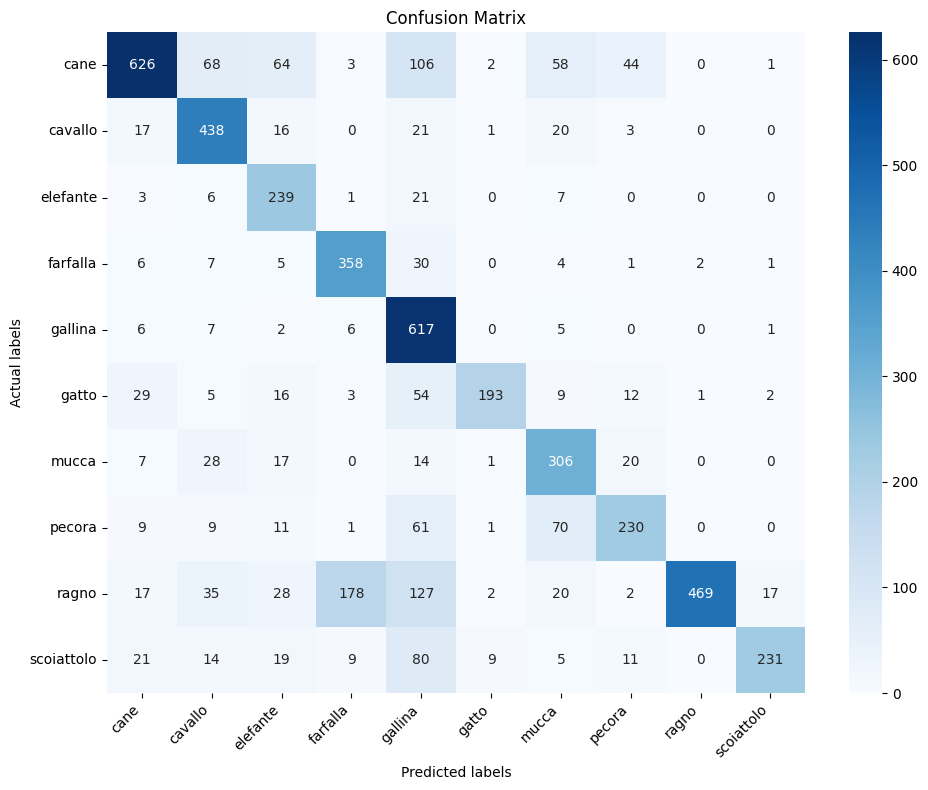

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Actual and predicted labels
actual_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Convert labels back to their original classes
actual_labels = label_encoder.inverse_transform(actual_labels)
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Unique labels
unique_labels = label_encoder.classes_

# Compute confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import classification_report

all_preds = np.argmax(predictions, axis=1)
all_labels = np.argmax(y_test, axis=1)

class_report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_)

print(class_report)


              precision    recall  f1-score   support

        cane       0.84      0.64      0.73       972
     cavallo       0.71      0.85      0.77       516
    elefante       0.57      0.86      0.69       277
    farfalla       0.64      0.86      0.74       414
     gallina       0.55      0.96      0.70       644
       gatto       0.92      0.60      0.72       324
       mucca       0.61      0.78      0.68       393
      pecora       0.71      0.59      0.64       392
       ragno       0.99      0.52      0.69       895
  scoiattolo       0.91      0.58      0.71       399

    accuracy                           0.71      5226
   macro avg       0.75      0.72      0.71      5226
weighted avg       0.77      0.71      0.71      5226

